# KNN Algorithm - Glass Problem
## ------------------------------------------------------------------------------------------------------------------------------

### Problem Statement :- Prepare a model for glass classification using KNN.

## 1. Import necessary libraries :

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 2. Import datasets:

In [2]:
glass_data = pd.read_csv('glass.csv',sep=',')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## 3. Data Understanding :

### 3.1 Data Description:

* RI : refractive index

* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

* Mg: Magnesium

* AI: Aluminum

* Si: Silicon

* K:Potassium

* Ca: Calcium

* Ba: Barium

* Fe: Iron

##### Type: Type of glass: (class attribute)
* 1 -- building_windows_float_processed
* 2 --building_windows_non_float_processed
* 3 --vehicle_windows_float_processed
* 4 --vehicle_windows_non_float_processed (none in this database)
* 5 --containers
* 6 --tableware
* 7 --headlamps


### 3.2 Initial Analysis

In [3]:
glass_data.shape

(214, 10)

In [4]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

## 4. Data Pre-Processing :

In [6]:
X = glass_data.drop(labels='Type',axis=1)
y = glass_data[['Type']]

In [7]:
X.shape,y.shape

((214, 9), (214, 1))

In [36]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(X)
scaled_x = pd.DataFrame(data =x_scaled,columns=X.columns)
scaled_x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


## 5. Model Building :

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.25,random_state=12,shuffle=True,stratify=y)

In [38]:
X_train.shape,y_train.shape

((160, 9), (160, 1))

In [39]:
X_test.shape,y_test.shape

((54, 9), (54, 1))

## 6. Model Training | Testing | Evaluation

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

### for k=3

In [41]:
knn_classifier = KNeighborsClassifier(n_neighbors=3,)
knn_classifier.fit(X_train,y_train)
y_predict_train_1 = knn_classifier.predict(X_train)
y_predict_test_1 = knn_classifier.predict(X_test)

print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_1),4))
print('Training Classification Report :\n',classification_report(y_train,y_predict_train_1))
print('Test Accuracy Score :',round(accuracy_score(y_test,y_predict_test_1),4))
print('Test Classification Report :\n',classification_report(y_test,y_predict_test_1))

Train Accuracy Score : 0.8125
Training Classification Report :
               precision    recall  f1-score   support

           1       0.76      0.92      0.83        52
           2       0.82      0.88      0.85        57
           3       0.75      0.23      0.35        13
           5       0.83      0.50      0.62        10
           6       1.00      0.71      0.83         7
           7       0.90      0.90      0.90        21

    accuracy                           0.81       160
   macro avg       0.84      0.69      0.73       160
weighted avg       0.82      0.81      0.80       160

Test Accuracy Score : 0.7593
Test Classification Report :
               precision    recall  f1-score   support

           1       0.59      0.89      0.71        18
           2       0.87      0.68      0.76        19
           3       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
         

### for k = 5

In [42]:
knn_classifier = KNeighborsClassifier(n_neighbors=5,n_jobs=-1,algorithm='kd_tree',weights='distance')
knn_classifier.fit(X_train,y_train)
y_predict_train_2 = knn_classifier.predict(X_train)
y_predict_test_2 = knn_classifier.predict(X_test)

print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_2),4))
print('Training Classification Report :\n',classification_report(y_train,y_predict_train_2))
print('Test Accuracy Score :',round(accuracy_score(y_test,y_predict_test_2),4))
print('Test Classification Report :\n',classification_report(y_test,y_predict_test_2))

Train Accuracy Score : 1.0
Training Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        21

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

Test Accuracy Score : 0.7222
Test Classification Report :
               precision    recall  f1-score   support

           1       0.60      0.83      0.70        18
           2       0.71      0.63      0.67        19
           3       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7

### for k = 7

In [43]:
knn_classifier = KNeighborsClassifier(n_neighbors=7,)
knn_classifier.fit(X_train,y_train)
y_predict_train_3 = knn_classifier.predict(X_train)
y_predict_test_3 = knn_classifier.predict(X_test)

print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_3),4))
print('Training Classification Report :\n',classification_report(y_train,y_predict_train_3))
print('Test Accuracy Score :',round(accuracy_score(y_test,y_predict_test_3),4))
print('Test Classification Report :\n',classification_report(y_test,y_predict_test_3))

Train Accuracy Score : 0.7
Training Classification Report :
               precision    recall  f1-score   support

           1       0.63      0.87      0.73        52
           2       0.69      0.74      0.71        57
           3       0.00      0.00      0.00        13
           5       0.75      0.30      0.43        10
           6       1.00      0.57      0.73         7
           7       0.90      0.86      0.88        21

    accuracy                           0.70       160
   macro avg       0.66      0.56      0.58       160
weighted avg       0.66      0.70      0.67       160

Test Accuracy Score : 0.6852
Test Classification Report :
               precision    recall  f1-score   support

           1       0.58      0.83      0.68        18
           2       0.72      0.68      0.70        19
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         3
           6       1.00      0.50      0.67         2
           7

## ----------------------------------------------------------------------------------------------------------------------------

### How to choose optimal number of neigbours :

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
cv_scores= []
training_accuracy = []
test_accuracy =[]

for i in range(1,30,2):
    knn_model = KNeighborsClassifier(n_neighbors= i,)
    cross_validation_scored = cross_val_score(estimator=knn_model, X= scaled_x,y=y,cv=5)
    knn_model.fit(scaled_x,y)
    training_accuracy.append(knn_model.score(X_train,y_train))
    test_accuracy.append(knn_model.score(X_test,y_test))
    cv_scores.append(cross_validation_scored.mean())

In [46]:
cv_scores.index(max(cv_scores))

1

In [47]:
import numpy as np
cv_score_array = np.array(cv_scores)
training_accuracy_array = np.array(training_accuracy)
test_accuracy_array = np.array(test_accuracy)
classification_report_array = np.array(classification_report)

scores = {'cv_scores': cv_score_array,
         'training_accuracy':training_accuracy_array,
         'test_accuracy':test_accuracy_array}
pd.DataFrame(scores)

,cv_scores,training_accuracy,test_accuracy
0,0.621262,1.00000,1.000000
1,0.649834,0.81875,0.907407
2,0.649723,0.76250,0.851852
3,0.621595,0.68750,0.759259
4,0.616944,0.72500,0.722222
5,0.598228,0.68750,0.722222
6,0.598228,0.70625,0.722222
7,0.570321,0.66875,0.703704
8,0.584385,0.66250,0.685185
9,0.589037,0.66250,0.685185


### using visuals:

In [48]:
import matplotlib.pyplot as plt

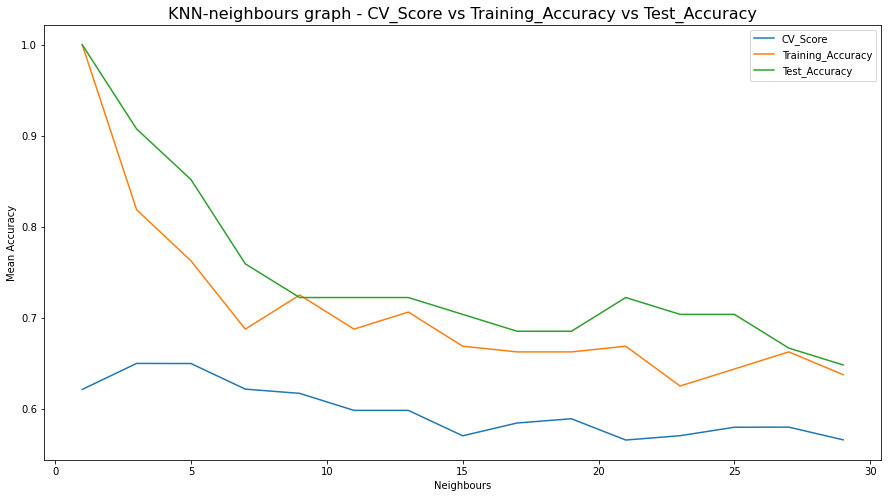

In [49]:
plt.figure(figsize=(15,8))
plt.plot(range(1,31,2),cv_scores,label = 'CV_Score')
plt.plot(range(1,31,2),training_accuracy,label = 'Training_Accuracy')
plt.plot(range(1,31,2),test_accuracy,label = 'Test_Accuracy')
plt.title('KNN-neighbours graph - CV_Score vs Training_Accuracy vs Test_Accuracy',fontsize=16)
plt.legend()
plt.xlabel('Neighbours')
plt.ylabel('Mean Accuracy')
plt.show()

### Prediction using params :

In [50]:
cv_scores= []
training_accuracy = []
test_accuracy =[]

for i in range(1,30,2):
    knn_model = KNeighborsClassifier(n_neighbors= i,algorithm='brute',weights='uniform',n_jobs=1)
    cross_validation_scored = cross_val_score(estimator=knn_model, X= scaled_x,y=y,cv=7)
    knn_model.fit(scaled_x,y)
    training_accuracy.append(knn_model.score(X_train,y_train))
    test_accuracy.append(knn_model.score(X_test,y_test))
    cv_scores.append(cross_validation_scored.mean())

In [51]:
cv_scores.index(max(cv_scores))

1

In [52]:
import numpy as np
cv_score_array = np.array(cv_scores)
training_accuracy_array = np.array(training_accuracy)
test_accuracy_array = np.array(test_accuracy)
classification_report_array = np.array(classification_report)

scores = {'cv_scores': cv_score_array,
         'training_accuracy':training_accuracy_array,
         'test_accuracy':test_accuracy_array}
pd.DataFrame(scores)

,cv_scores,training_accuracy,test_accuracy
0,0.635330,1.00000,1.000000
1,0.659140,0.81875,0.907407
2,0.649770,0.76250,0.851852
3,0.630876,0.68750,0.759259
4,0.602919,0.72500,0.722222
5,0.588633,0.68750,0.722222
6,0.602919,0.70625,0.722222
7,0.593548,0.66875,0.703704
8,0.589247,0.66250,0.685185
9,0.593702,0.66250,0.685185


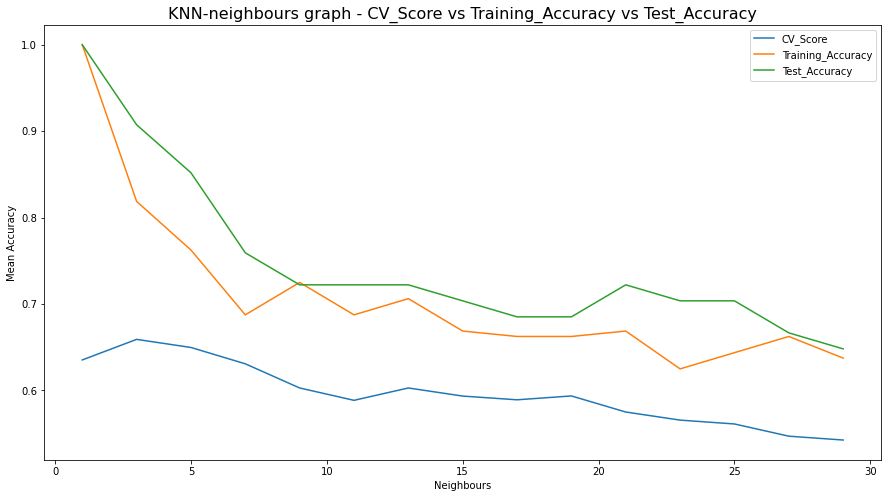

In [53]:
plt.figure(figsize=(15,8))
plt.plot(range(1,31,2),cv_scores,label = 'CV_Score')
plt.plot(range(1,31,2),training_accuracy,label = 'Training_Accuracy')
plt.plot(range(1,31,2),test_accuracy,label = 'Test_Accuracy')
plt.title('KNN-neighbours graph - CV_Score vs Training_Accuracy vs Test_Accuracy',fontsize=16)
plt.legend()
plt.xlabel('Neighbours')
plt.ylabel('Mean Accuracy')
plt.show()

In [54]:
cv_scores= []
training_accuracy = []
test_accuracy =[]

for i in range(1,30,2):
    knn_model = KNeighborsClassifier(n_neighbors= i,algorithm='ball_tree',weights='uniform',n_jobs=-1)
    cross_validation_scored = cross_val_score(estimator=knn_model, X= scaled_x,y=y,cv=10)
    knn_model.fit(scaled_x,y)
    training_accuracy.append(knn_model.score(X_train,y_train))
    test_accuracy.append(knn_model.score(X_test,y_test))
    cv_scores.append(cross_validation_scored.mean())

In [55]:
import numpy as np
cv_score_array = np.array(cv_scores)
training_accuracy_array = np.array(training_accuracy)
test_accuracy_array = np.array(test_accuracy)
classification_report_array = np.array(classification_report)

scores = {'cv_scores': cv_score_array,
         'training_accuracy':training_accuracy_array,
         'test_accuracy':test_accuracy_array}
pd.DataFrame(scores)

,cv_scores,training_accuracy,test_accuracy
0,0.658225,1.00000,1.000000
1,0.691126,0.81875,0.907407
2,0.663203,0.76250,0.851852
3,0.625758,0.68750,0.759259
4,0.620996,0.72500,0.722222
5,0.616234,0.68750,0.722222
6,0.602381,0.70625,0.722222
7,0.592857,0.66875,0.703704
8,0.583766,0.66250,0.685185
9,0.593290,0.66250,0.685185


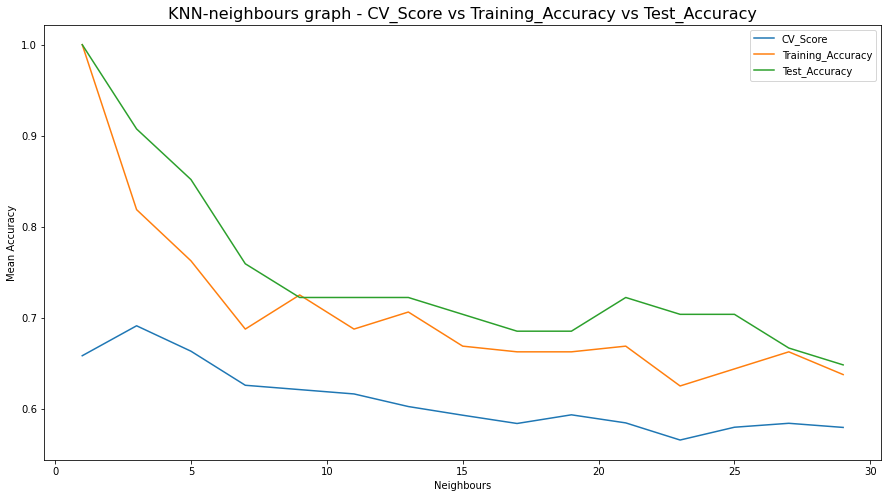

In [56]:
plt.figure(figsize=(15,8))
plt.plot(range(1,31,2),cv_scores,label = 'CV_Score')
plt.plot(range(1,31,2),training_accuracy,label = 'Training_Accuracy')
plt.plot(range(1,31,2),test_accuracy,label = 'Test_Accuracy')
plt.title('KNN-neighbours graph - CV_Score vs Training_Accuracy vs Test_Accuracy',fontsize=16)
plt.legend()
plt.xlabel('Neighbours')
plt.ylabel('Mean Accuracy')
plt.show()